In [2]:
import cv2
import numpy as np
import matplotlib
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt

# white color mask
infile = '/Volumes/RAKSHA/ORCC/SH/20190404ecker sued 1/MARK0011.png'
image = cv2.imread(infile)


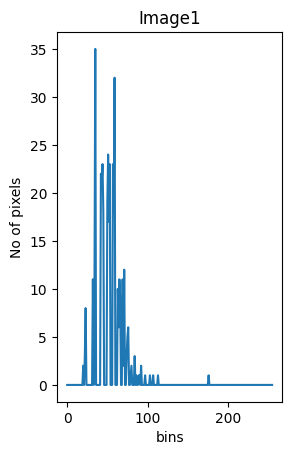

In [3]:
#print(img)

# Reading the image and converting into B/W
image = cv2.imread(infile)
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

hist=cv2.calcHist(gray_img,[0],None,[256],[0,256])

plt.subplot(121)
plt.title("Image1")
plt.xlabel('bins')
plt.ylabel("No of pixels")
plt.plot(hist)
plt.show()


In [4]:
clahe = cv2.createCLAHE(clipLimit = 1)
cl1 = clahe.apply(gray_img) + 10

In [ ]:
clahe_images=np.concatenate((cl1,gray_img),axis=1)
cv2.imshow("Images",clahe_images)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
cv2.imwrite('/Volumes/RAKSHA/ORCC/SH/20190404ecker sued 1/MARK0011_enh.png', cl1)

-------------------

In [29]:
print(np.shape((cl1)))
lower = np.uint8([0, 200, 0])
upper = np.uint8([255, 255, 255])

print(upper)

(258, 400)
[255 255 255]


In [ ]:
import cv2
import numpy as np
import matplotlib
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
import xtf_png

#xtf_png.xtf2png('2019apr04_ecker_sued_10002.xtf', 'formated.png')


kernel_size = 5
blur_gray = cv2.GaussianBlur(gray_img, (kernel_size, kernel_size), 0)


low_threshold = 10
high_threshold = 200
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)


rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 15  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 50  # minimum number of pixels making up a line
max_line_gap = 20  # maximum gap in pixels between connectable line segments
line_image = np.copy(cl1) * 0  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)

for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 5)

# Draw the lines on the  image
lines_edges = cv2.addWeighted(cl1, 0.8, line_image, 1, 0)

cv2.imwrite('detected1.png', lines_edges)
cv2.waitKey(0)
cv2.destroyAllWindows()
